In [10]:
from eso import ESO

# Hyperparameters

In [ ]:

##hyperparameters related to ESO

generations = 20
num_epochs_training = 30
population_size = 200
#Chromosome
stack= False
#Gene
num_genes=None
min_num_genes = 1
max_num_genes = 10
min_height = 1
band_height = None
max_height = 16
#fitness
lambda_metric=0.7
lamdba_size=0.3

#-------------------------

In [ ]:
# all the hyperparameters by default

settings = {
    "algorithm": {"max_generations": generations},
    "genetic_operator": {
        "mutation_rate": 0.3,
        "crossover_rate": 0.6,
        "reproduction_rate": 0.1,
        "mutation_height_range": 5,
        "mutation_position_range": 20,
    },
    "selection_operator": {"tournament_size": 4},
    "data": {
        "force_recreate_dataset": False,
        "keep_in_memory": False,
        "species_folder": "~/ESO_project/Data",
        "train_size": 0.6,
        "test_size": 0.2,
        "reshuffle": False,
        "positive_class": "gibbon",
        "negative_class": "no-gibbon",
    },
    "preprocessing": {
        "sample_rate": 9600,
        "lowpass_cutoff": 2000,
        "downsample_rate": 4800,
        "nyquist_rate": 2400,
        "segment_duration": 4,
        "nb_negative_class": 10,
        "file_type": "svl",
        "audio_extension": ".wav",
        "n_fft": 1024,
        "hop_length": 256,
        "n_mels": 128,
        "f_min": 0,
        "f_max": 2000,
        "f_min_chromosome": 0,
        "f_max_chromosome": 5000,
    },
    "population": {"pop_size": population_size},
    "gene": {"min_position": 0, "max_position": -1, "min_height": min_height, "max_height": max_height, "band_height": band_height},
    "chromosome": {
        "num_genes": num_genes,
        "min_num_genes": min_num_genes,
        "max_num_genes": max_num_genes,
        "lambda_1": lambda_metric,
        "lambda_2": lamdba_size,
        "stack": stack,
    },
    "model": {
        "optimizer_name": "adam",
        "loss_function_name": "cross_entropy",
        "num_epochs": num_epochs_training,
        "batch_size": 64,
        "learning_rate": 0.001,
        "shuffle": True,
        "metric": "f1",
    },
    "cnn_architecture": {
        "conv_layers": 1,
        "conv_filters": 8,
        "dropout_rate": 0.5,
        "conv_kernel": 8,
        "max_pooling_size": 4,
        "fc_units": 32,
        "fc_layers": 2,
        "conv_padding": None,  #padding controls the amount of padding applied to the input. It can be either a string {‘valid’, ‘same’} or an int / a tuple of ints giving the amount of implicit padding applied on both sides.
    
    }
}

# Run ESO 

In [ ]:
#Call the class eso 
e = ESO(
            settings=settings,
            log_level=10,
            results_path="~/ESO_project/ESO/results/",
            log_path="~/ESO_project/ESO/logs/",
            tensorboard_log_dir="~/ESO_project/ESO/logs/tensorboard/",
        )

In [ ]:
import time
start=time.time()
best_chromosome = e.run()
execution_time=time.time()-start
print(execution_time)

# Evaluation

In [ ]:
#Evaluate Eso using the test dataset created in a similar way 
# to the training/validation dataset based on the manual annotations

e.evaluate(test_type="simple", save_name="Simple")

In [ ]:
#Evaluate Eso on the entire files of the testing dataset (takes time)
# When force_calc_spectrograms=True, spectrograms will be re-generated each time the function is called
# and will not be saved for future use.

e.evaluate(test_type="entire", save_name="Entire_dataset", force_calc_spectrograms=True)

In [ ]:
#Evaluate Eso on the entire files of the testing dataset 
# When force_calc_spectrograms=False, spectrograms generated from the full testing dataset 
# will be saved and reused the next time this function is called.


e.evaluate(test_type="entire", save_name="Entire_dataset", force_calc_spectrograms=False)

# Visualisation of the spectrograms and the bands extracted by the best chromosome

In [18]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from eso.model.model import Model

In [ ]:
#load the chromosome 
chromosome = np.load("~/ESO_project/ESO/results/eso_chromosome.pkl", allow_pickle=True)
print(chromosome)

Chromosome Info:
Number of Genes: 4
Validation F1: 0.9801748028138989
Trainable parameters: 66186
Fitness: 0.14511611951662218
Genes: Gene 1: (15, 4)
Gene 2: (21, 16)
Gene 3: (75, 12)
Gene 4: (112, 4)




In [ ]:
# Load the preprocessed training dataset
X = np.load("~/ESO_project/Data/SavedData/preprocessed/train/X.pkl", allow_pickle=True)
Y = np.load("~/ESO_project/Data/SavedData/preprocessed/train/Y.pkl", allow_pickle=True)


In [ ]:
# Load the unpreprocessed training dataset
X_un = np.load("~/ESO_project/Data/SavedData/unpreprocessed/train/X.pkl", allow_pickle=True)
Y_un = np.load("~/ESO_project/Data/SavedData/unpreprocessed/train/Y.pkl", allow_pickle=True)


In [22]:
#keep only the presence windows
X = X[Y[:, 1] == 1]
X_un = X_un[Y_un[:, 1] == 1]

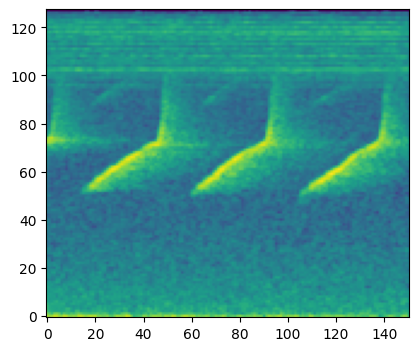

In [23]:

#plot the spectrogram without preprocessing (low-filtering and downsampling)
plt.figure(figsize=(8, 4))
plt.imshow(X_un[200])
plt.gca().invert_yaxis()
plt.show()

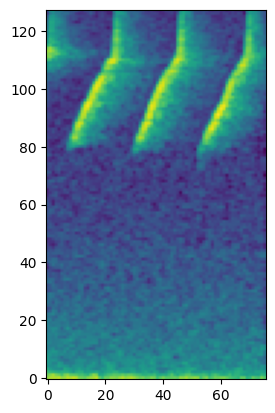

In [24]:
#plot the spectrogram with preprocessing
plt.imshow(X[200])
plt.gca().invert_yaxis()
plt.show()

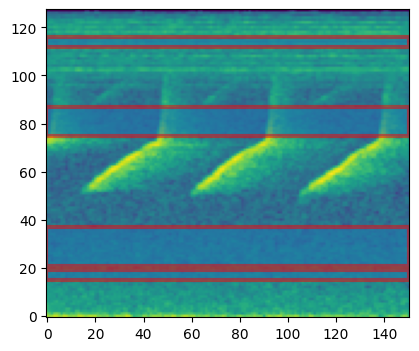

In [25]:
#plot the spectrogram without preprocessing with the bands extracted by the best Eso chromosome

%matplotlib inline
plt.figure(figsize=(8, 4))
plt.imshow(X_un[200], cmap="viridis")
#plt.axis('off')
genes = chromosome.get_genes()
color=color=["black","white", "magenta","cyan","blue", "red"]
for i in range(len(genes)): 
    gene_pos = genes[i].get_band_position()
    gene_height = genes[i].get_band_height()
    plt.axhspan(gene_pos, gene_pos+gene_height, edgecolor="red", linewidth=3,alpha=0.5)
    # invert y axis
plt.gca().invert_yaxis()
plt.show()